### Computation Graph: Forward Propagation and Backward Propagation 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Add Gate
<img src="./images/AddGate.jpg" width="25%" align=center />

In [2]:
class AddGate(object):
    
    def __init__(self, name=None):
        self.name = name
        pass
    
    def forward(self, x, y):
        return x+y
    
    def backward(self, dz):
        return dz, dz
    
    pass

#### Gradient Test
<img src="./images/GradientTest.jpg" width="50%" align=center />

In [3]:
a = AddGate()
x = 2.5
y = 4.7
z = a.forward(x, y)
dz = 9.3
dx_dy_1 = a.backward(dz)
print("dx_dy_1: ", dx_dy_1)
theta = 0.0001
dx_2 = dz*((a.forward(x+theta, y)-a.forward(x-theta, y))/(2*theta))
dy_2 = dz*((a.forward(x, y+theta)-a.forward(x, y-theta))/(2*theta))
print("dx_dy_2: ", (dx_2, dy_2))

dx_dy_1:  (9.3, 9.3)
dx_dy_2:  (9.300000000060926, 9.299999999978326)


#### Multiply Gate
<img src="./images/MultiplyGate.jpg" width="30%" align=center />

In [4]:
class MultiplyGate(object):
    
    def __init__(self, name=None):
        self.name = name
        pass
    
    def forward(self, x, y):
        z = x*y
        self.__x = x
        self.__y = y
        return z
    
    def backward(self, dz):
        dx = self.__y * dz
        dy = self.__x * dz
        return dx, dy
    
    pass

#### Gradient Test

In [5]:
m = MultiplyGate()
x = 2.5
y = 4.7
z = m.forward(x, y)
dz = 9.3
dx_dy_1 = m.backward(dz)
print("dx_dy_1: ", dx_dy_1)
theta = 0.0001
dx_2 = dz*((m.forward(x+theta, y)-m.forward(x-theta, y))/(2*theta))
dy_2 = dz*((m.forward(x, y+theta)-m.forward(x, y-theta))/(2*theta))
print("dx_dy_2: ", (dx_2, dy_2))

dx_dy_1:  (43.71000000000001, 23.25)
dx_dy_2:  (43.71000000007985, 23.249999999945814)


#### Dot Gate
<img src="./images/DotGate.jpg" width="75%" align=center />

In [6]:
class DotGate(object):
    
    def __init__(self, name=None):
        self.name = name
        pass
    
    def forward(self, W, X):
        Z = np.dot(W, X)
        self.__W = W
        self.__X = X
        return Z
    
    def backward(self, dZ):
        dW = np.dot(dZ, self.__X.T)
        dX = np.dot(self.__W.T, dZ)
        return dW, dX
    
    pass

#### Gradient Test

In [7]:
d = DotGate()

W = np.array([[1.3, 5.4], 
             [2.3, 9.1]])

X = np.array([[4.3, 0.6], 
             [7.5, 12.8]])

Z = d.forward(W, X)

dZ = np.array([[3.2, 2.7], 
              [8.7, 1.2]])

dW_1, dX_1 = d.backward(dZ)

theta = 0.0001

delta = np.array([[theta, 0], [0, 0]])
dw11 = np.sum(dZ*(d.forward(W+delta, X)-d.forward(W-delta, X))/(2*theta))
dx11 = np.sum(dZ*(d.forward(W, X+delta)-d.forward(W, X-delta))/(2*theta))

delta = np.array([[0, theta], [0, 0]])
dw12 = np.sum(dZ*(d.forward(W+delta, X)-d.forward(W-delta, X))/(2*theta))
dx12 = np.sum(dZ*(d.forward(W, X+delta)-d.forward(W, X-delta))/(2*theta))

delta = np.array([[0, 0], [theta, 0]])
dw21 = np.sum(dZ*(d.forward(W+delta, X)-d.forward(W-delta, X))/(2*theta))
dx21 = np.sum(dZ*(d.forward(W, X+delta)-d.forward(W, X-delta))/(2*theta))

delta = np.array([[0, 0], [0, theta]])
dw22 = np.sum(dZ*(d.forward(W+delta, X)-d.forward(W-delta, X))/(2*theta))
dx22 = np.sum(dZ*(d.forward(W, X+delta)-d.forward(W, X-delta))/(2*theta))

dW_2 = np.array([[dw11, dw12], [dw21, dw22]])
dX_2 = np.array([[dx11, dx12], [dx21, dx22]])

print("dW_1\n", dW_1)
print("dW_2\n", dW_2)
print("dX_1\n", dX_1)
print("dX_2\n", dX_2)

dW_1
 [[15.38 58.56]
 [38.13 80.61]]
dW_2
 [[15.38 58.56]
 [38.13 80.61]]
dX_1
 [[24.17  6.27]
 [96.45 25.5 ]]
dX_2
 [[24.17  6.27]
 [96.45 25.5 ]]


#### Bias Gate
<img src="./images/BiasGate.jpg" width="60%" align=center />

In [8]:
class BiasGate(object):
    
    def __init__(self, name=None):
        self.name = name
        pass
    
    def forward(self, X, b):
        self.__X = X
        self.__b = b
        return np.add(X, b)
    
    def backward(self, dZ):
        db = np.sum(dZ, axis=1, keepdims = True)
        dX = dZ
        return dX, db
    
    pass

#### Gradient Test

In [9]:
bg = BiasGate()

X = np.array([[2.3, 5.4], 
              [8.7, 3.2]])

b = np.array([[1.3], 
              [-0.7]])

Z = bg.forward(X, b)

dZ = np.array([[6.5, 1.6], 
              [-5.2, 8.7]])

dX_1, db_1 = bg.backward(dZ)

theta = 0.0001

delta = np.array([[theta, 0], 
                  [0, 0]])
dx11 = (dZ*((bg.forward(X+delta, b)-bg.forward(X-delta, b))/(2*theta)))[0][0]
delta = np.array([[0, theta], 
                  [0, 0]])
dx12 = (dZ*((bg.forward(X+delta, b)-bg.forward(X-delta, b))/(2*theta)))[0][1]
delta = np.array([[0, 0], 
                  [theta, 0]])
dx21 = (dZ*((bg.forward(X+delta, b)-bg.forward(X-delta, b))/(2*theta)))[1][0]
delta = np.array([[0, 0], 
                  [0, theta]])
dx22 = (dZ*((bg.forward(X+delta, b)-bg.forward(X-delta, b))/(2*theta)))[1][1]

delta = np.array([[theta], 
                  [0]])
db1 = ((np.sum(dZ*((bg.forward(X, b+theta)-bg.forward(X, b-theta))/(2*theta)), axis=1, keepdims = True)))[0][0]

delta = np.array([[0], 
                  [theta]])
db2 = ((np.sum(dZ*((bg.forward(X, b+theta)-bg.forward(X, b-theta))/(2*theta)), axis=1, keepdims = True)))[1][0]

dX_2 = np.array([[dx11, dx12], 
                 [dx21, dx22]])

db_2 = np.array([[db1], 
                 [db2]])

print("dX_1: \n", dX_1)
print("dX_2: \n", dX_2)
print("db_1: \n", db_1)
print("db_2: \n", db_2)

dX_1: 
 [[ 6.5  1.6]
 [-5.2  8.7]]
dX_2: 
 [[ 6.5  1.6]
 [-5.2  8.7]]
db_1: 
 [[8.1]
 [3.5]]
db_2: 
 [[8.1]
 [3.5]]


#### Sigmoid Gate
<img src="./images/SigmoidGate.jpg" width="75%" align=center />

In [10]:
class SigmoidGate(object):
    
    def __init__(self, name=None):
        self.name = name
        pass
    
    def forward(self, Z):
        A = 1 / (1 + np.exp(-np.array(Z)))
        self.__A = A
        return A

    def backward(self, dA):
        dZ = dA*self.__A*(1-self.__A)
        return dZ
    
    pass

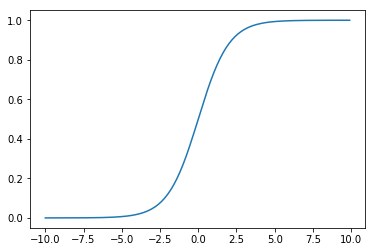

In [11]:
s = SigmoidGate()
x = np.arange(-10, 10, 0.1)
y = s.forward(x)
plt.plot(x, y)

#### Gradient Test

In [12]:
s = SigmoidGate()
Z = 0.3
A = s.forward(Z)
dA = 0.63
dZ_1 = s.backward(dA)

theta = 0.0001
dZ_2 = dA*((s.forward(Z+theta)-s.forward(Z-theta))/(2*theta))

print("dZ_1: ", dZ_1)
print("dZ_2: ", dZ_2)

dZ_1:  0.1540087363651699
dZ_2:  0.15400873624548672


#### Relu Gate
<img src="./images/ReluGate.jpg" width="40%" align=center />

In [13]:
class ReluGate(object):
    
    def __init__(self, name=None):
        self.name = name
        pass
    
    def forward(self, Z):
        self.__A = np.maximum(Z, 0)
        return self.__A
    
    def backward(self, dA):
        dZ = np.multiply(dA, np.float32(self.__A > 0))
        return dZ
     
    pass

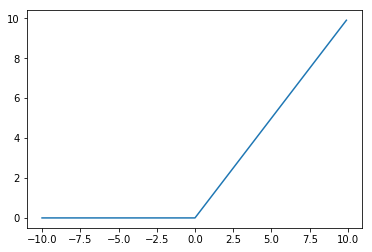

In [14]:
r = ReluGate()
x = np.arange(-10, 10, 0.1)
y = r.forward(x)
plt.plot(x, y)

#### Gradient Test

In [15]:
r = ReluGate()
Z = 0.3
A = r.forward(Z)
dA = 0.63
dZ_1 = r.backward(dA)

theta = 0.0001
dZ_2 = dA*((r.forward(Z+theta)-r.forward(Z-theta))/(2*theta))

print("dZ_1: ", dZ_1)
print("dZ_2: ", dZ_2)

dZ_1:  0.63
dZ_2:  0.6299999999999306


In [16]:
r = ReluGate()
Z = -0.3
A = r.forward(Z)
dA = 0.63
dZ_1 = r.backward(dA)

theta = 0.0001
dZ_2 = dA*((r.forward(Z+theta)-r.forward(Z-theta))/(2*theta))

print("dZ_1: ", dZ_1)
print("dZ_2: ", dZ_2)

dZ_1:  0.0
dZ_2:  0.0


#### Softmax Gate
<img src="./images/SoftmaxGate.jpg" width="50%" align=center />

In [17]:
class SoftmaxGate(object):
    
    def __init__(self, name=None):
        self.name = name
        pass
    
    def forward(self, X):
        Y = np.array(np.exp(X)/np.sum(np.exp(X), axis=0))
        self.__X = X
        self.__Y = Y
        return Y
    
    def backward(self, dY):
        n, m = dY.shape
        temp = np.sum(self.__Y*dY, axis=0)
        dX = np.array([[self.__Y[k][i]*(dY[k][i]-temp[i]) \
                        for k in range(n)] for i in range(m)])
        dX = dX.T
        return dX
    
    pass

#### Gradient Test

In [18]:
s = SoftmaxGate()
X = np.array([[1.3, 4.3], 
              [3.2, 2.3], 
              [5.6, 1.7]])
Y = s.forward(X)
print("Y: \n", Y)
dY = np.array([[1.4, -2.8], 
               [1.2, 9.2], 
               [-12.2, 0.5]])
dX_1 = s.backward(dY)
print("dX_1: \n", dX_1)

theta = 0.0001
delta = np.array([[theta, 0], 
                  [0, 0], 
                  [0, 0]])
dx_1_1 = np.sum(dY*((s.forward(X+delta)-s.forward(X-delta))/(2*theta)))
delta = np.array([[0, 0], 
                  [theta, 0], 
                  [0, 0]])
dx_1_2 = np.sum(dY*((s.forward(X+delta)-s.forward(X-delta))/(2*theta)))
delta = np.array([[0, 0], 
                  [0, 0], 
                  [theta, 0]])
dx_1_3 = np.sum(dY*((s.forward(X+delta)-s.forward(X-delta))/(2*theta)))
delta = np.array([[0, theta], 
                  [0, 0], 
                  [0, 0]])
dx_2_1 = np.sum(dY*((s.forward(X+delta)-s.forward(X-delta))/(2*theta)))
delta = np.array([[0, 0], 
                  [0, theta], 
                  [0, 0]])
dx_2_2 = np.sum(dY*((s.forward(X+delta)-s.forward(X-delta))/(2*theta)))
delta = np.array([[0, 0], 
                  [0, 0], 
                  [0, theta]])
dx_2_3 = np.sum(dY*((s.forward(X+delta)-s.forward(X-delta))/(2*theta)))

dX_2 = np.array([[dx_1_1, dx_2_1],  
                 [dx_1_2, dx_2_2], 
                 [dx_1_3, dx_2_3]])
print("dX_2: \n", dX_2)

Y: 
 [[0.01228717 0.82671352]
 [0.08215074 0.11188351]
 [0.90556209 0.06140297]]
dX_1: 
 [[ 0.15152633 -1.27746411]
 [ 0.99665889  1.16971613]
 [-1.14818522  0.10774797]]
dX_2: 
 [[ 0.15152633 -1.27746411]
 [ 0.99665889  1.16971613]
 [-1.14818522  0.10774798]]
